In [1]:
import math
%load_ext autoreload
%autoreload 2

In [2]:
import csv
import re
import pandas as pd
import numpy as np

import pandas
import os

from reconchess import GameHistory
import matplotlib.pyplot as plt
from tqdm import tqdm

### Load games

In [3]:
data_path = "../game_logs/unranked_games"
reg = r"u([0-9])r([0-9])"

In [4]:
from reconchess import WinReason
from dataclasses import dataclass

BOT_NAME = "Zubat"

@dataclass
class GameData:
    opponent: str
    color: bool
    result: int
    reason: WinReason
    moves: int
    
    @classmethod
    def from_file(cls, file: str):
        return cls.from_hist(GameHistory.from_file(file))
    
    @staticmethod
    def from_hist(game_hist: GameHistory):
        return GameData(
            color=(color := game_hist.get_white_player_name() == BOT_NAME),
            result=(
                0 if game_hist.get_winner_color() is None else 
                1 if game_hist.get_winner_color() == color else 
                -1
            ),
            opponent=game_hist.get_black_player_name() if color else game_hist.get_white_player_name(),
            reason=game_hist.get_win_reason(),
            moves=game_hist.num_turns()
        )
        

In [5]:
dirs = [re.match(reg, s) for s in os.listdir(data_path)]
dirs = [dir for dir in dirs if dir is not None]
dirs

[<re.Match object; span=(0, 4), match='u0r0'>,
 <re.Match object; span=(0, 4), match='u0r1'>,
 <re.Match object; span=(0, 4), match='u0r2'>,
 <re.Match object; span=(0, 4), match='u0r3'>,
 <re.Match object; span=(0, 4), match='u0r4'>,
 <re.Match object; span=(0, 4), match='u1r0'>,
 <re.Match object; span=(0, 4), match='u1r1'>,
 <re.Match object; span=(0, 4), match='u1r2'>,
 <re.Match object; span=(0, 4), match='u2r0'>,
 <re.Match object; span=(0, 4), match='u2r1'>,
 <re.Match object; span=(0, 4), match='u2r2'>,
 <re.Match object; span=(0, 4), match='u2r3'>,
 <re.Match object; span=(0, 4), match='u2r4'>,
 <re.Match object; span=(0, 4), match='u3r0'>,
 <re.Match object; span=(0, 4), match='u3r1'>,
 <re.Match object; span=(0, 4), match='u3r2'>,
 <re.Match object; span=(0, 4), match='u4r0'>,
 <re.Match object; span=(0, 4), match='u4r1'>,
 <re.Match object; span=(0, 4), match='u4r2'>,
 <re.Match object; span=(0, 4), match='u4r3'>,
 <re.Match object; span=(0, 4), match='u4r4'>,
 <re.Match ob

In [6]:
from collections import defaultdict

games = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {})))
for dir in dirs:
    for opp in os.listdir(os.path.join(data_path, dir.string)):
        for game_id in os.listdir(os.path.join(data_path, dir.string, opp)):
            try:
                data =  GameData.from_file(os.path.join(data_path, dir.string, opp, game_id, f"game_{game_id}.log"))
                games[opp][int(dir.groups()[0])][int(dir.groups()[1])][game_id] = data
                print(data)
            except:
                print(f'{os.path.join(data_path, dir.string, opp, game_id, f"game_{game_id}.log")} NOT FOUND')

GameData(opponent='Oracle', color=False, result=1, reason=<WinReason.KING_CAPTURE: 1>, moves=74)
GameData(opponent='Oracle', color=False, result=1, reason=<WinReason.TIMEOUT: 2>, moves=60)
GameData(opponent='Oracle', color=False, result=-1, reason=<WinReason.KING_CAPTURE: 1>, moves=89)
GameData(opponent='Oracle', color=False, result=-1, reason=<WinReason.KING_CAPTURE: 1>, moves=33)
GameData(opponent='Oracle', color=False, result=1, reason=<WinReason.KING_CAPTURE: 1>, moves=88)
GameData(opponent='Oracle', color=False, result=1, reason=<WinReason.KING_CAPTURE: 1>, moves=104)
GameData(opponent='Oracle', color=False, result=1, reason=<WinReason.KING_CAPTURE: 1>, moves=78)
GameData(opponent='Oracle', color=False, result=1, reason=<WinReason.KING_CAPTURE: 1>, moves=22)
GameData(opponent='Oracle', color=False, result=1, reason=<WinReason.TIMEOUT: 2>, moves=30)
GameData(opponent='Oracle', color=False, result=1, reason=<WinReason.TIMEOUT: 2>, moves=0)
GameData(opponent='Oracle', color=False, re

In [83]:
opp = "Oracle"

for u in games[opp]:
    for r in games[opp][u]:
        print(f"uncertainty: {int(u)*25:03}, risk: {int(r)*0.125:0.3f} - "
              f"games: {len(games[opp][u][r]):02}  "
              f"wins: {len([g for g in games[opp][u][r].values() if g.result == 1]):02}  "
              f"losses: {len([g for g in games[opp][u][r].values() if g.result == -1]):02}  "
              f"ties: {len([g for g in games[opp][u][r].values() if g.result == 0]):02}")

uncertainty: 000, risk: 0.000 - games: 47  wins: 30  losses: 16  ties: 01
uncertainty: 000, risk: 0.125 - games: 46  wins: 27  losses: 16  ties: 03
uncertainty: 000, risk: 0.250 - games: 50  wins: 27  losses: 23  ties: 00
uncertainty: 000, risk: 0.375 - games: 43  wins: 24  losses: 18  ties: 01
uncertainty: 000, risk: 0.500 - games: 50  wins: 29  losses: 21  ties: 00
uncertainty: 025, risk: 0.000 - games: 50  wins: 28  losses: 19  ties: 03
uncertainty: 025, risk: 0.125 - games: 50  wins: 37  losses: 12  ties: 01
uncertainty: 025, risk: 0.250 - games: 37  wins: 26  losses: 11  ties: 00
uncertainty: 050, risk: 0.000 - games: 47  wins: 29  losses: 16  ties: 02
uncertainty: 050, risk: 0.125 - games: 48  wins: 31  losses: 16  ties: 01
uncertainty: 050, risk: 0.250 - games: 50  wins: 31  losses: 18  ties: 01
uncertainty: 050, risk: 0.375 - games: 17  wins: 07  losses: 09  ties: 01
uncertainty: 050, risk: 0.500 - games: 05  wins: 02  losses: 02  ties: 01
uncertainty: 075, risk: 0.000 - games:

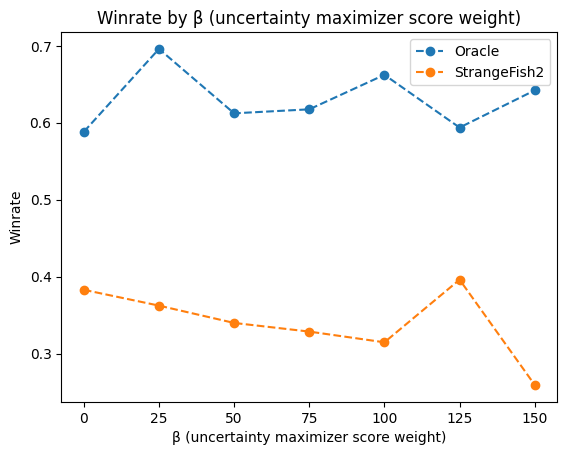

In [7]:
opps = ["Oracle", "StrangeFish2"]

res = {}
fig, ax = plt.subplots()

ax.set_xticks(np.arange(7) * 25)
# ax.set_ylim([0.5, 0.7])

for opp in opps:
    for u in games[opp]:
        res[int(u) * 25] = (len([g for r in games[opp][u] for g in games[opp][u][r].values() if g.result==1]) / 
                            len([g for r in games[opp][u] for g in games[opp][u][r].values() if g.result!=0]))
        
    ax.plot(res.keys(), res.values(), '--o', label=opp)

    
ax.set_xlabel("β (uncertainty maximizer score weight)")
ax.set_ylabel("Winrate")
ax.set_title(f"Winrate by β (uncertainty maximizer score weight)")
ax.legend()
    
# plt.savefig("imgs/winrate_chart_beta.png")
plt.show()

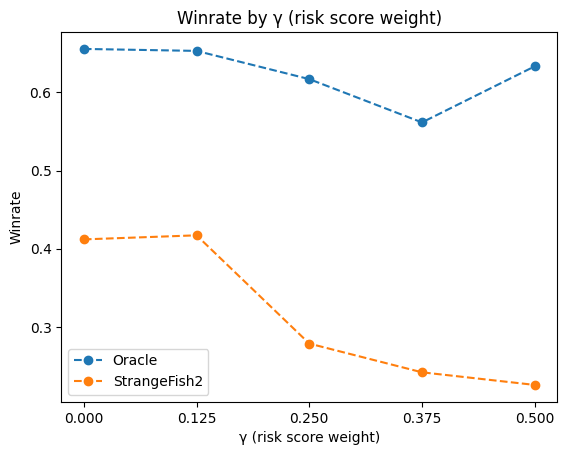

In [8]:
opps = ["Oracle", "StrangeFish2"]

res = {}

fig, ax = plt.subplots()

for opp in opps:
    for r in range(5):
        res[int(r) * 0.125] = (len([g for u in games[opp] for g in games[opp][u][r].values() if g.result==1]) / 
                            len([g for u in games[opp] for g in games[opp][u][r].values() if g.result!=0]))
    
    ax.plot(res.keys(), res.values(), '--o', label=opp)
    
ax.set_xticks(np.arange(5) * 0.125)

ax.set_xlabel("γ (risk score weight)")
ax.set_ylabel("Winrate")
ax.set_title(f"Winrate by γ (risk score weight)")
ax.legend()

# plt.savefig("imgs/winrate_chart_gamma.png")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20848\779210786.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{x*25}" for x in range(-1,7)])
C:\Users\User\AppData\Local\Temp\ipykernel_20848\779210786.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{x*0.125}" for x in range(-1,5)])


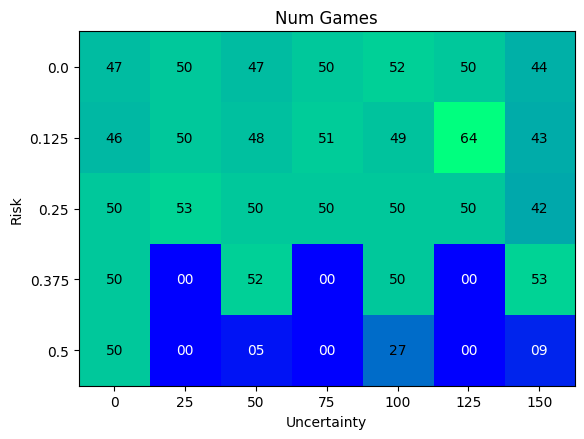

In [9]:
opp = "Oracle"

fig, ax = plt.subplots()

data = [[0 for _ in range(7)] for _ in range(5)]
for u in games[opp]:
    for r in games[opp][u]:
        data[r][u] = min(100, len(games[opp][u][r]))

ax.matshow(data, cmap='winter')
for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, f"{z:02}", ha='center', va='center', color=("black" if z > 20 else "white"))
    
ax.set_xticklabels([f"{x*25}" for x in range(-1,7)])
ax.set_yticklabels([f"{x*0.125}" for x in range(-1,5)])
ax.xaxis.set_ticks_position("bottom")

ax.set_xlabel("Uncertainty")
ax.set_ylabel("Risk")
ax.set_title("Num Games")
plt.show() 

C:\Users\User\AppData\Local\Temp\ipykernel_20848\1697794159.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{x*25}" for x in range(-1,7)])
C:\Users\User\AppData\Local\Temp\ipykernel_20848\1697794159.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{x*0.125}" for x in range(-1,5)])


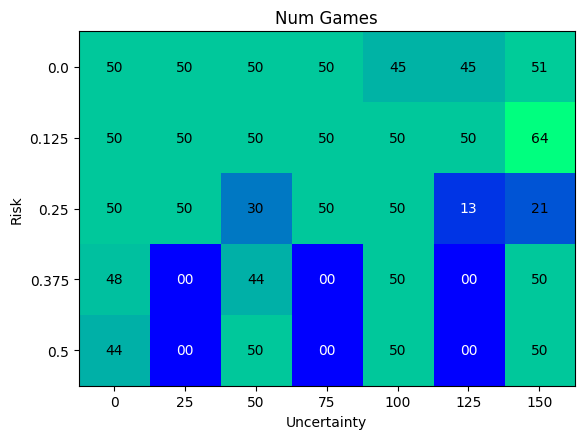

In [10]:
opp = "StrangeFish2"

fig, ax = plt.subplots()

data = [[0 for _ in range(7)] for _ in range(5)]
for u in games[opp]:
    for r in games[opp][u]:
        data[r][u] = len(games[opp][u][r])

ax.matshow(data, cmap='winter')
for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, f"{z:02}", ha='center', va='center', color=("black" if z > 20 else "white"))
    
ax.set_xticklabels([f"{x*25}" for x in range(-1,7)])
ax.set_yticklabels([f"{x*0.125}" for x in range(-1,5)])
ax.xaxis.set_ticks_position("bottom")

ax.set_xlabel("Uncertainty")
ax.set_ylabel("Risk")
ax.set_title("Num Games")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20848\2549237561.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{x*25}" for x in range(-1,7)])
C:\Users\User\AppData\Local\Temp\ipykernel_20848\2549237561.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{x*0.125}" for x in range(-1,5)])


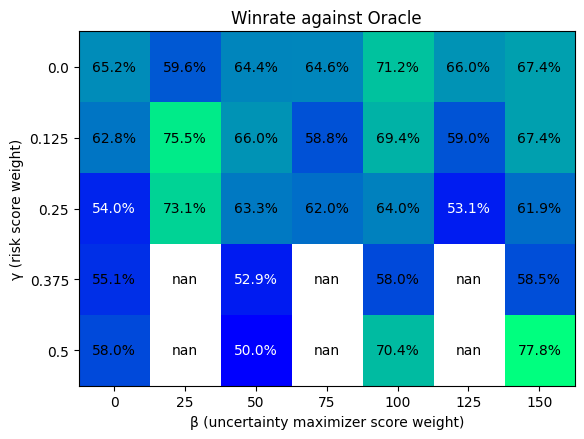

In [11]:
opp = "Oracle"

fig, ax = plt.subplots()

data = [[float("nan") for _ in range(7)] for _ in range(5)]
for u in games[opp]:
    for r in games[opp][u]:
        dom = len([g for g in games[opp][u][r].values() if g.result != 0])
        data[r][u] = (len([g for g in games[opp][u][r].values() if g.result == 1]) / dom) if dom != 0 else float('nan')

ax.matshow(data, cmap='winter')
for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, f"{100*z:02.1f}%" if (not np.isnan(z)) else z, ha='center', va='center', color=("white" if z < 0.55 else "black"))
    
ax.set_xticklabels([f"{x*25}" for x in range(-1,7)])
ax.set_yticklabels([f"{x*0.125}" for x in range(-1,5)])
ax.xaxis.set_ticks_position("bottom")

ax.set_xlabel("β (uncertainty maximizer score weight)")
ax.set_ylabel("γ (risk score weight)")
ax.set_title(f"Winrate against {opp}")
plt.savefig("imgs/winrate_chart_oracle.png")

C:\Users\User\AppData\Local\Temp\ipykernel_20848\217180319.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{x*25}" for x in range(-1,7)])
C:\Users\User\AppData\Local\Temp\ipykernel_20848\217180319.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{x*0.125}" for x in range(-1,5)])


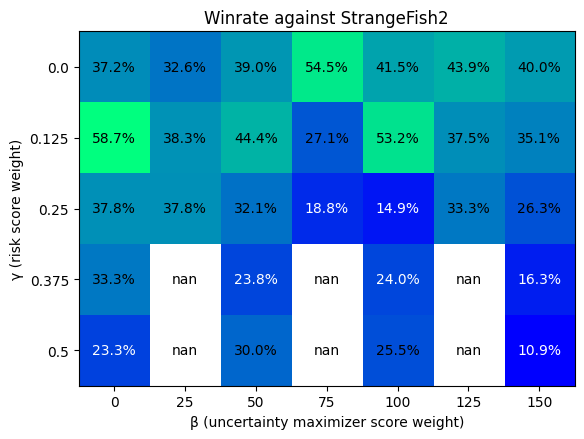

In [12]:
opp = "StrangeFish2"

fig, ax = plt.subplots()

data = [[float("nan") for _ in range(7)] for _ in range(5)]
for u in games[opp]:
    for r in games[opp][u]:
        dom = len([g for g in games[opp][u][r].values() if g.result != 0])
        data[r][u] = (len([g for g in games[opp][u][r].values() if g.result == 1]) / dom) if dom != 0 else float('nan')

ax.matshow(data, cmap='winter')
for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, f"{100*z:02.1f}%" if (not np.isnan(z)) else z, ha='center', va='center', color=("white" if z < 0.25 else "black"))
    
ax.set_xticklabels([f"{x*25}" for x in range(-1,7)])
ax.set_yticklabels([f"{x*0.125}" for x in range(-1,5)])
ax.xaxis.set_ticks_position("bottom")

ax.set_xlabel("β (uncertainty maximizer score weight)")
ax.set_ylabel("γ (risk score weight)")
ax.set_title(f"Winrate against {opp}")
# plt.savefig("imgs/winrate_chart_sf2.png")
plt.show()

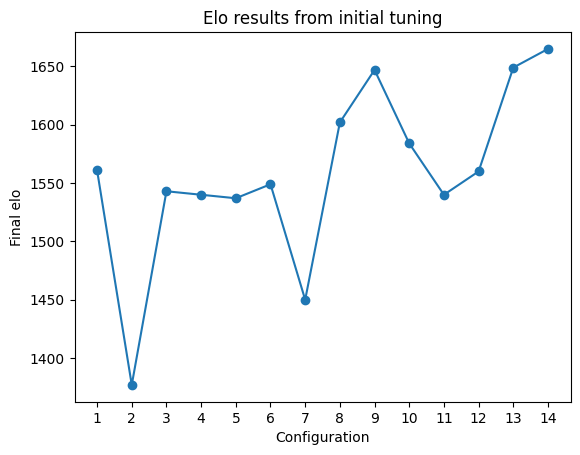

In [99]:
data = [1561, 1377, 1543, 1540, 1537, 1549, 1450, 1602, 1647, 1584, 1540, 1560, 1649, 1665]

plt.plot(np.arange(1, 15), data, "-o")
plt.xticks(np.arange(1, 15))
plt.title("Elo results from initial tuning")
plt.xlabel("Configuration")
plt.ylabel("Final elo")

plt.savefig("imgs/tuning_elo.png")